<h2 style="color:cyan">The task is the predict the CO2EMISSION of a vehicle given it's other attributes.</h2>

In [2]:
# Importing basic libraries

import warnings
warnings.simplefilter("ignore")
import os
import pprint
pretty_printer = pprint.PrettyPrinter()

In [3]:
# Importing libraries necessary for working with dataframes and making plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
# Reading the dataset, without specifying any index column

dataset_path = os.path.join("Data", "FuelConsumption.csv")

fuel_data = pd.read_csv(dataset_path)

<h3 style="color:cyan">Creating seperate train and test sets to prevent Selection Bias</h3>

In [4]:
fuel_data.shape

(1067, 13)

In [5]:
# Let's use 853 rows for our train set, and the rest for the test set
train_set_size = int(len(fuel_data) * 80 / 100)
train_data = fuel_data.sample(train_set_size)
test_data = fuel_data.drop(index=train_data.index)

In [6]:
# Let's make sure our dataset splitting operation was correct.

assert((len(train_data) + len(test_data)) == len(fuel_data))

print("The Train and Test set contains the same entries at least once:", set(test_data.index).issubset(set(train_data.index)))

The Train and Test set contains the same entries at least once: False


In [7]:
# Looking at the first rows of the dataset

train_data.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
13,2014,ASTON MARTIN,RAPIDE,SUBCOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
124,2014,BMW,M6 GRAN COUPE,COMPACT,4.4,8,AM7,Z,17.3,11.5,14.7,19,338
75,2014,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
440,2014,GMC,SAVANA 1500 CARGO CONV,VAN - CARGO,5.3,8,A4,E,23.9,18.5,21.5,13,344
838,2014,NISSAN,ARMADA 4WD,SUV - STANDARD,5.6,8,A5,X,19.1,13.4,16.5,17,380


In [8]:
# Looking at the data types of the columns

train_data.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

<h3 style="color:cyan">The dataset only contains int, float and object (strings in this case).</h3>

## The Columns in the dataset:
<li>
    <ul>MODELYEAR</ul>
    <ul>MAKE</ul>
    <ul>MODEL</ul>
    <ul>VEHICLECLASS</ul>
    <ul>ENGINESIZE</ul>
    <ul>CYLINDERS</ul>
    <ul>TRANSMISSION</ul>
    <ul>FUELTYPE</ul>
    <ul>FUELCONSUMPTION_CITY</ul>
    <ul>FUELCONSUMPTION_HWY</ul>
    <ul>FUELCONSUMPTION_COMB</ul>
    <ul>FUELCONSUMPTION_COMB_MPG</ul>
    <ul>CO2EMISSIONS</ul>
</li>

<br>
<br>

<h3 style="color:cyan">The metadata for this dataset is not available. So we'd require some google searches to learn more about what data the columns represent</h3><br>


<p style="color:cyan">The Car's Model Year indicates any manufacturer-specified evolution in mid-cycle of a model range</p>

<p style="color:cyan">The Car's Make refers to the brand of the car</p>

<p style="color:cyan">The Car's Model refers to the specific model of the car</p>

<p style="color:cyan">The Car's Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc).</p>

<p style="color:cyan">The Car's Cylinders refer to the number of Cylinders in the car.</p>

<p style="color:cyan">The Car's Tranmission type. The Transmission system of a car is the mechanism by which power created by the engine is transferred to the driving wheels.</p>

<p style="color:cyan">The Car's Fuel type. The type of fuel the car uses.</p>

<p style="color:cyan">The four columns, FUELCONSUMPTION_CITY FUELCONSUMPTION_HWY FUELCONSUMPTION_COMB FUELCONSUMPTION_COMB_MPG related to the Fuel Consumption of the car. But their units and the meaning of "CITY", "HWY" and "COMB" is unknown. Also the difference between "COMB" and "COMB_MPG"</p>

<p style="color:cyan">The Car's CO2 Emission: g CO2/km: grammes of carbon dioxide per km </p>

In [9]:
# Looking at the summary of the dataset (without objects)

train_data.describe(include=["int64", "float64"])

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,853.0,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,2014.0,3.381829,5.842907,13.403283,9.541266,11.669754,26.247362,257.940211
std,0.0,1.429570,1.811851,4.145362,2.813392,3.518005,7.440910,63.857253
min,2014.0,1.000000,3.000000,4.700000,4.900000,4.800000,11.000000,110.000000
25%,2014.0,2.000000,4.000000,10.400000,7.600000,9.100000,21.000000,209.000000
50%,2014.0,3.500000,6.000000,12.700000,8.900000,11.000000,26.000000,251.000000
75%,2014.0,4.400000,8.000000,15.700000,10.900000,13.400000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,59.000000,488.000000


In [10]:
# Looking at the summary of the dataset (objects)

train_data.describe(include=["object"])

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,853,853,853,853,853
unique,39,579,16,22,4
top,FORD,F150 FFV 4X4,MID-SIZE,A6,X
freq,73,8,140,182,406


<h3 style="color:cyan">So, there's no missing values in the dataset. The columns, "MAKE", "MODEL", "VEHICLECLASS", "TRANSMISSION" and "FUELTYPE" is categorical qualitative data.</h3>
<h3 style="color:cyan">Now, we have to remove the non-qualitative data or encode it into Ordinal or One hot encoded quantitative values.</h3>

In [11]:
# Analyzing the unique features in the columns cotaining strings (Qualitative categorical values)

train_data_objects = train_data.select_dtypes(["object"]).copy()
train_data_objects_columns = train_data_objects.columns

for col in train_data_objects_columns :
    pretty_printer.pprint({col: 
                           {"#unique values" : train_data_objects[col].nunique(),
                            "unique values": train_data_objects[col].unique().tolist()[0:21] #Printing the first 20 values only
                           }
                          })
    print("\n")

{'MAKE': {'#unique values': 39,
          'unique values': ['ASTON MARTIN',
                            'BMW',
                            'BENTLEY',
                            'GMC',
                            'NISSAN',
                            'INFINITI',
                            'KIA',
                            'HYUNDAI',
                            'DODGE',
                            'VOLVO',
                            'MINI',
                            'CHEVROLET',
                            'LEXUS',
                            'LAND ROVER',
                            'TOYOTA',
                            'VOLKSWAGEN',
                            'PORSCHE',
                            'AUDI',
                            'MERCEDES-BENZ',
                            'ACURA',
                            'SCION']}}


{'MODEL': {'#unique values': 579,
           'unique values': ['RAPIDE',
                             'M6 GRAN COUPE',
                             'MULSAN

<p style="color:cyan">The MAKE column has 30 unique values. Meaning 30 different companies.</p>
<p style="color:cyan">The MODEL column has 663 unique values, Meaning the dataset contains data about 663 different vehicles.</p>
<p style="color:cyan">The TRANSMISSION column has 22 unique values, Meaning the dataset contains data abbout 22 different tranmission types.</p>
<p style="color:cyan">But in reality, the type of the transmission can be cut down to "A" and "M", meaning automatic or manual.</p>

<h3 style="color:cyan">Let's see if we need to consider the "MAKE" and "MODEL" columns for our model. Also let's observe if we should change the transmission types to a smaller chunk.</h3>

In [12]:
### Calculating Mutual Information

from sklearn.feature_selection import mutual_info_regression
def mutual_information_regression(input_data, y):
    # Since the CO2EMISSION output can contain any positive real value, we need to use "mutual_information_regression" instead of "mutual_information_classification" 
    mi_input_data = input_data.copy()
    for col in mi_input_data.select_dtypes(["object"]):
        mi_input_data[col], _ = mi_input_data[col].factorize()
    
    ndf = pd.Series(mutual_info_regression(mi_input_data, y),index=mi_input_data.columns).sort_values(ascending=False)

    plt.figure(figsize=(14,10))
    sns.barplot(x=ndf, y=ndf.index)
    plt.show()

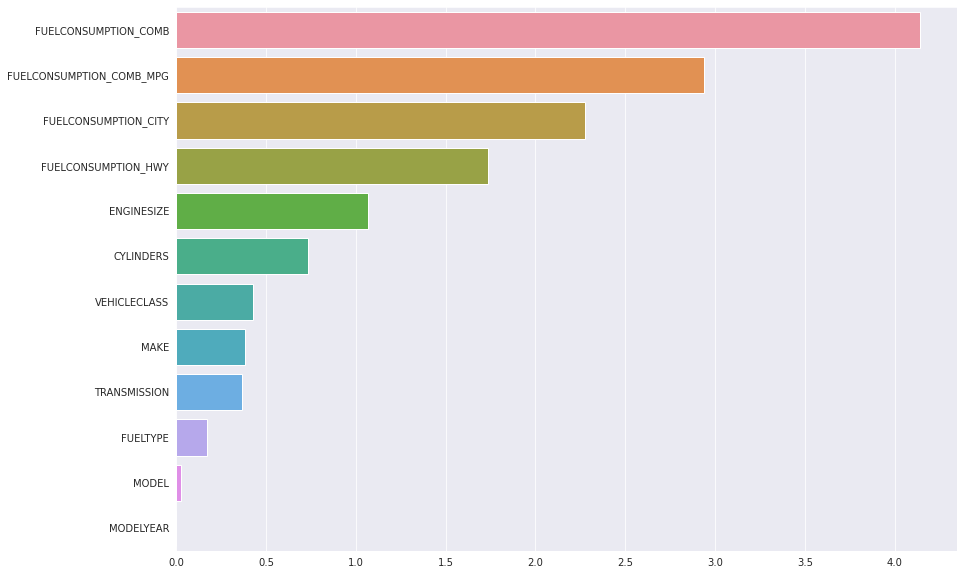

In [13]:
fuel_input_data = train_data.drop(columns=["CO2EMISSIONS"]).copy()
fuel_output_data = train_data["CO2EMISSIONS"].copy()

mutual_information_regression(fuel_input_data, fuel_output_data)

<h3 style="color:cyan">So, the features MODELYEAR, MODEL, FUELTYPE, TRANSMISSION, MAKE and VEHICLECLASS column's MI score is below 0.5</h3>

<p style="color:cyan"> As the MODELYEAR, has almost no correlation with the output, we can just remove it from the train set.</p>
<p style="color:cyan">We can also remove FUELTYPE and MAKE features,</p>

1. But let's observe if cutting down the TRANSMISSION columns values to a single character ("A" or "M") can improve it's correlation with the output.<br>
2. Let's also add an extra column with the average of FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY and FUELCONSUMPTION_COMB.
3. Let's see if VEHICLECLASS is correlated to the output.

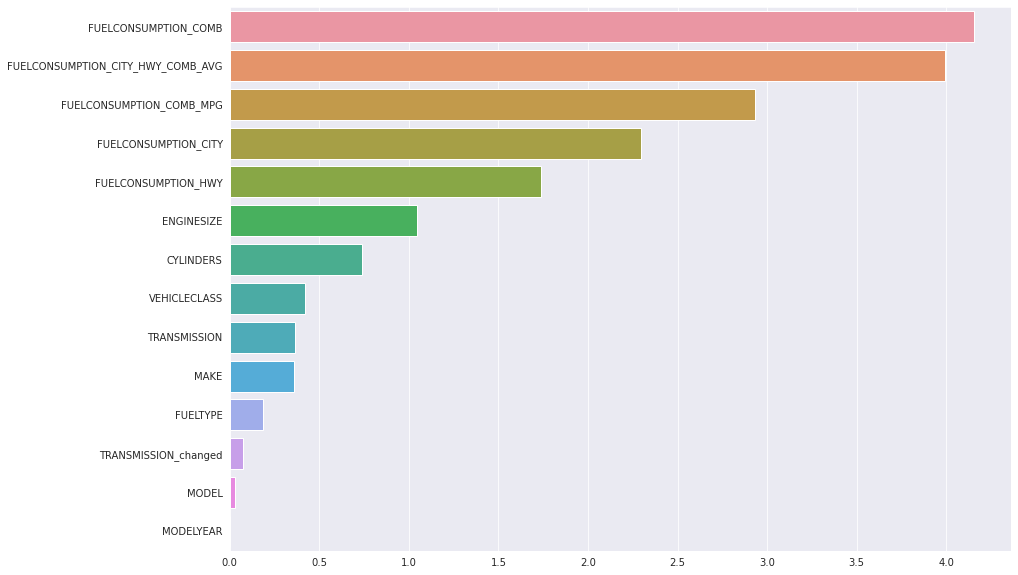

In [14]:
fuel_input_data = train_data.drop(columns=["CO2EMISSIONS"]).copy()
fuel_output_data = train_data["CO2EMISSIONS"].copy()

fuel_input_data["TRANSMISSION_changed"] = fuel_input_data["TRANSMISSION"].map(lambda x: x.strip()[0])
fuel_input_data["FUELCONSUMPTION_CITY_HWY_COMB_AVG"] = fuel_input_data[["FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB"]].mean(axis=1)
mutual_information_regression(fuel_input_data, fuel_output_data)

<h3 style="color:cyan">The average of the three columns seem really good! It achieves an MI score of 4.0! Let's keep it. <br>
But on the other hand, it seems like the new variable we created performs even worse! Since we lose a lot of the data. So we don't need to add it.</h3>

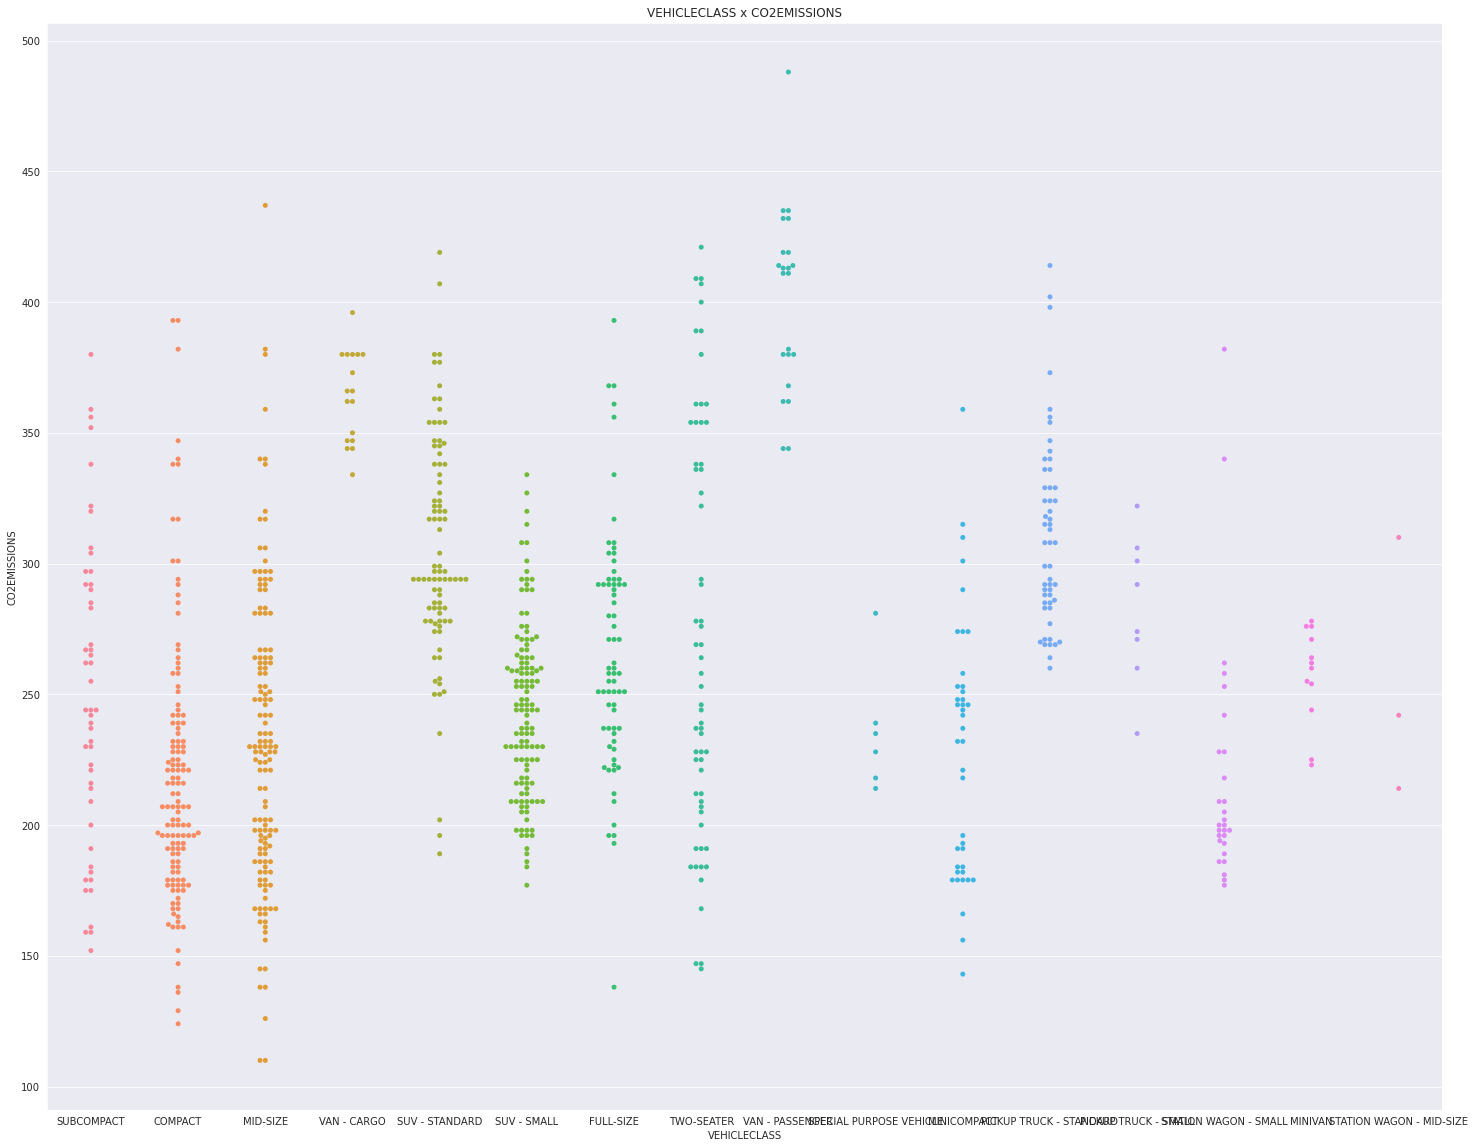

In [15]:
# Looking at the VEHICLECLASS output.

plt.figure(figsize=(25,20))
sns.swarmplot(x=train_data["VEHICLECLASS"], y=train_data["CO2EMISSIONS"])
plt.title("VEHICLECLASS x CO2EMISSIONS")
plt.show()

<h3 style="color:cyan">As it seems, MID-SIZE and COMPACT cars can have lower CO2EMISSION in comparison to other vehicle types.<br>
Hypothesis: The newer cars have lower / higher CO2EMISSION in comparison to the older cars.<br>
Let's use the MODELYEAR dataset to see whether it's true or not.</h3>

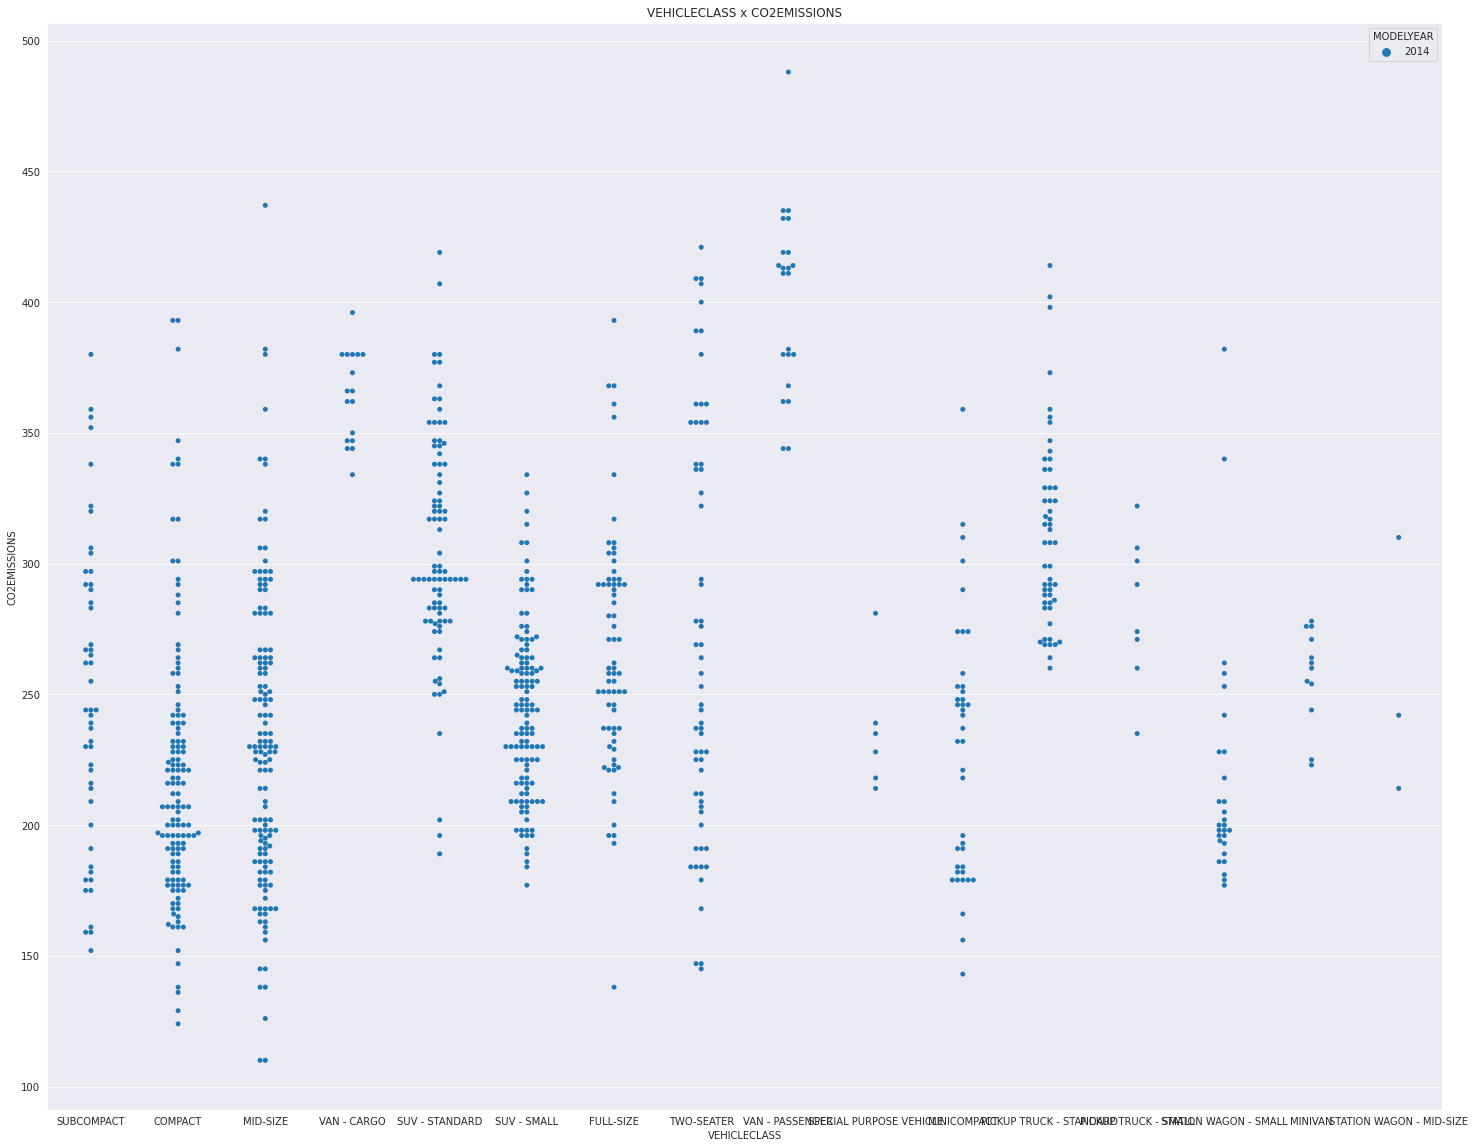

In [16]:
# Looking at the VEHICLECLASS output.

plt.figure(figsize=(25,20))
sns.swarmplot(x=train_data["VEHICLECLASS"], y=train_data["CO2EMISSIONS"], hue=train_data["MODELYEAR"])
plt.title("VEHICLECLASS x CO2EMISSIONS")
plt.show()

<h2 style="color:cyan">It seems like our dataset only contains info about cars from the year 2014! That's something I didn't observe before. <br>
That explains why it results in such a low MI score!<h2>

<h3 style="color:cyan">Let's only use the columns which we require and add the additional column(s)<br>
The code for that has been added on the feature_engineering class in the utils.py file.</h3>

<br>

<h3 style="color:cyan"> Now let's create a pipeline and train a model</h3>

Things we need:
1. A ML Pipeline
2. Imputation for filling in missing numerical values with the average for numerical data. (In case, there is missing values in the test set. Or missing values found during production.)
3. Adding the preprocessing layers to our model.
4. Scaling each of the input features. Here, sclaing would be a good option, since teach of the features in our dataset is larger than or equal to 0.
5. A Regression algorithm. I'll use XGBoost since Boosting algorithms are much powerful and accurate than standard algorithms.
6. Using Grid Search for Hyperparameter tuning

Things we do not need:
1. Imputation for filling in missing numerical values with the most frequent value for categorical data. Since there is no categorical data.
2. Ordinal or One-Hot Encoding. Since there is no categorical data.

In [17]:
# Importing libraries required for training ML model

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from utils import feature_engineering

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [18]:
numerical_encoder = Pipeline(steps=[
    ("numerical imputer", SimpleImputer(strategy="mean")),
    ("minmax scaling", MinMaxScaler())
    ])

preprocess = Pipeline(steps=[
    ("feature_engineering", feature_engineering()),
    ("numerical encoding", numerical_encoder)
])

model = XGBRegressor(random_state=0)

model_pipeline = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("model", model)])

In [22]:
param_grid = {
    "model__n_estimators": [100,200,300,400],
    "model__learning_rate":[0.1],
    "model__max_depth":[50,100,200],
    "model__booster":["gbtree", "dart"]
}
search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=2, verbose=True)

In [23]:
train_input = train_data.drop(columns=["CO2EMISSIONS"]).copy()
train_output = train_data['CO2EMISSIONS'].copy()

In [24]:
search.fit(train_input, train_output)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('feature_engineering',
                                                         feature_engineering()),
                                                        ('numerical encoding',
                                                         Pipeline(steps=[('numerical '
                                                                          'imputer',
                                                                          SimpleImputer()),
                                                                         ('minmax '
                                                                          'scaling',
                                                                          MinMaxScaler())]))])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                   

In [41]:
# Saving the pipeline in a variable

trained_pipeline = search.best_estimator_

In [42]:
# Getting the input and output data from the test set

test_input = test_data.drop(columns=["CO2EMISSIONS"])
test_output = test_data["CO2EMISSIONS"]

In [43]:
# Calculating the accuracy on the train and test sets

print("Train set score: %.5f" % trained_pipeline.score(train_input, train_output))
print("Test set score: %.5f" % trained_pipeline.score(test_input, test_output))

Train set score: 0.98945
Test set score: 0.97538


In [5]:
# Saving the model

import joblib

pipeline_path = os.path.join("Pipeline", "pipeline.pkl")
joblib.dump(trained_pipeline,pipeline_path)

['Pipeline/pipeline.pkl']